# kNN

In [47]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

x = pd.read_csv("/content/drive/MyDrive/Classroom/DCC127-2020.3-A - MINERAÇÃO DE DADOS - DEPTO DE CIENCIA DA COMPUTACAO  ICE/codigos/reg_2_tr_X.dat")
y = pd.read_csv("/content/drive/MyDrive/Classroom/DCC127-2020.3-A - MINERAÇÃO DE DADOS - DEPTO DE CIENCIA DA COMPUTACAO  ICE/codigos/reg_2_tr_Y.dat")

# Caso se queira trabalhar com os dados unificados
dados = pd.concat([x, y], axis=1)

dados


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x,y
0,4.497025,2.388141
1,1.757268,1.470955
2,2.009345,1.922170
3,-1.507367,-0.719164
4,5.237485,2.208115
...,...,...
70,4.231161,2.085883
71,-1.493786,-0.308389
72,2.334805,1.882355
73,4.482874,2.268271


In [48]:
novoX = pd.DataFrame( [1], columns={"x"} )
yEsperado = pd.DataFrame( [1], columns={"y"} )

novo = pd.concat([novoX, yEsperado], axis=1)

novo

,x,y
0,1,1


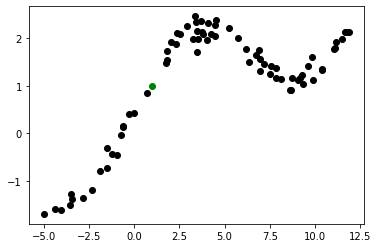

In [49]:
import matplotlib.pyplot as plt

plt.scatter(x, y, marker="o", c="black")
plt.scatter(novoX, yEsperado, marker="o", c="green")

plt.show()

* Buscando os vizinhos mais próximos

[[0.26549572 0.7572682  0.7980896 ]]
[[ 5  1 24]]


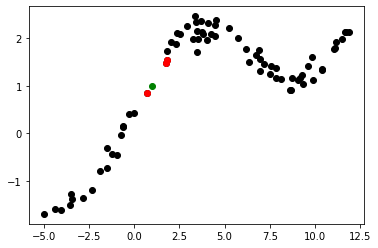

In [50]:
from sklearn.neighbors import NearestNeighbors

modelo = NearestNeighbors( n_neighbors=3 )
modelo.fit(x)

distancias, iVizinhos = modelo.kneighbors( novoX )

print(distancias)
print(iVizinhos)

plt.scatter(x, y, marker="o", c="black")
plt.scatter(novoX, yEsperado, marker="o", c="green")
plt.scatter(x.iloc[ iVizinhos[0], : ], y.iloc[ iVizinhos[0], : ], marker="o", c="red")
plt.show()

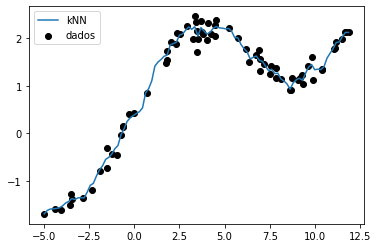

In [51]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# modelo = KNeighborsRegressor( n_neighbors=5 )
modelo = KNeighborsRegressor( n_neighbors=5, weights="distance" )
modelo.fit( x, y )

xs = np.linspace( min(x.values), max(x.values), 100 )
ys = modelo.predict( xs )

plt.scatter(x, y, marker="o", c="black", label="dados")
plt.plot(xs, ys, label="kNN")
plt.legend()
plt.show()

* Usando um limiar de vizinhança (raio)

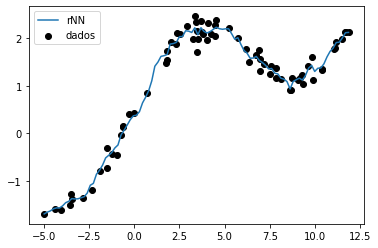

In [52]:
from sklearn.neighbors import RadiusNeighborsRegressor

modelo = RadiusNeighborsRegressor( radius=1.0, weights="distance" )
modelo.fit( x, y )

xs = np.linspace( min(x.values), max(x.values), 100 )
ys = modelo.predict( xs )

plt.scatter(x, y, marker="o", c="black", label="dados")
plt.plot(xs, ys, label="rNN")
plt.legend()
plt.show()

# Método dos Mínimos Quadrados

In [53]:
# criar uma matriz A e um vetor Y
# A^t A c = A^t Y

A = np.zeros( shape=(len(dados), 2) )
A[:, 0] = 1
A[:, 1] = dados.x
A = np.matrix(A)
At = np.transpose(A)
Y = np.transpose( np.matrix( dados.y ) )

print(A)
print(At)
print(Y)

[[ 1.0000000e+00  4.4970249e+00]
 [ 1.0000000e+00  1.7572682e+00]
 [ 1.0000000e+00  2.0093448e+00]
 [ 1.0000000e+00 -1.5073673e+00]
 [ 1.0000000e+00  5.2374846e+00]
 [ 1.0000000e+00  7.3450428e-01]
 [ 1.0000000e+00  3.3784243e+00]
 [ 1.0000000e+00  2.9141333e+00]
 [ 1.0000000e+00  1.0358684e+01]
 [ 1.0000000e+00  8.6531912e+00]
 [ 1.0000000e+00  7.5544377e+00]
 [ 1.0000000e+00  1.1032285e+01]
 [ 1.0000000e+00  3.7234601e+00]
 [ 1.0000000e+00  1.1853350e+01]
 [ 1.0000000e+00  9.1516244e+00]
 [ 1.0000000e+00 -3.5427174e+00]
 [ 1.0000000e+00  7.8305554e+00]
 [ 1.0000000e+00  2.3469988e+00]
 [ 1.0000000e+00  4.4800554e+00]
 [ 1.0000000e+00 -1.2165585e+00]
 [ 1.0000000e+00  6.9332372e+00]
 [ 1.0000000e+00  9.2777895e+00]
 [ 1.0000000e+00 -4.0705510e+00]
 [ 1.0000000e+00  3.4566372e+00]
 [ 1.0000000e+00  1.7980896e+00]
 [ 1.0000000e+00  9.6283590e+00]
 [ 1.0000000e+00  1.8048051e+00]
 [ 1.0000000e+00  2.5424801e+00]
 [ 1.0000000e+00  8.6259390e+00]
 [ 1.0000000e+00  7.8626691e+00]
 [ 1.00000

In [54]:
# A^t A c = A^t Y

c = np.linalg.solve( At*A, At*Y )

print(c)

[[0.38307866]
 [0.17064042]]


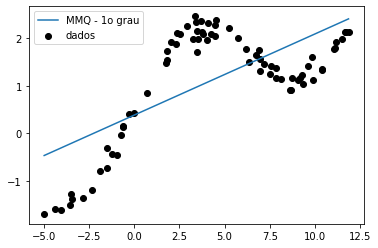

In [55]:
ys = c[0,0] + c[1, 0]*xs

plt.scatter(x, y, marker="o", c="black", label="dados")
plt.plot(xs, ys, label="MMQ - 1o grau")
plt.legend()
plt.show()

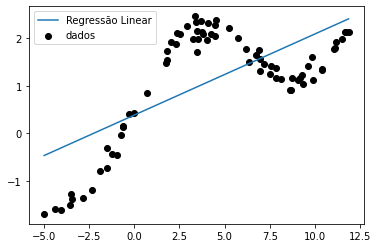

In [56]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x, y)

ys = modelo.predict(xs)

plt.scatter(x, y, marker="o", c="black", label="dados")
plt.plot(xs, ys, label="Regressão Linear")
plt.legend()
plt.show()

In [57]:
# g(x) = c0 phi0(x) + c1 phi1(x) + c2 phi2(x) + c3 phi3(x)
# phi0(x) = 1
# phi1(x) = x
# phi2(x) = x^2
# phi3(x) = x^3

A = np.zeros( shape=(len(dados), 4) )
A[:, 0] = 1
A[:, 1] = dados.x
A[:, 2] = dados.x*dados.x 
A[:, 3] = dados.x*dados.x*dados.x 

A = np.matrix(A)
At = np.transpose(A)

c = np.linalg.solve(At*A, At*Y)
c


matrix([[ 0.8773703 ],
        [ 0.41859023],
        [-0.05975485],
        [ 0.00246545]])

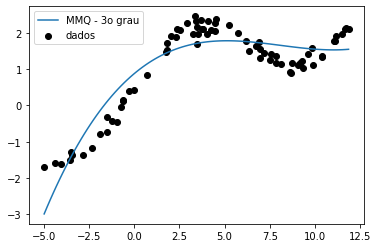

In [58]:
ys = c[0, 0] + c[1, 0]*xs + c[2, 0]*xs*xs + c[3, 0]*xs*xs*xs

plt.scatter(x, y, marker="o", c="black", label="dados")
plt.plot(xs, ys, label="MMQ - 3o grau")
plt.legend()
plt.show()

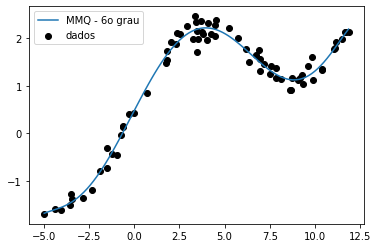

In [59]:
componentes = 7
A = np.zeros(shape=(len(dados), componentes))
for i in range(0, componentes):
  A[:, i] = pow( dados.x, i )

A = np.matrix(A)
At = np.transpose(A)
c = np.linalg.solve(At*A, At*Y)

ys = np.zeros(shape=(len(xs), 1))
for i in range(0, componentes):
  ys = ys + c[i, 0]*pow(xs, i)

plt.scatter(x, y, marker="o", c="black", label="dados")
plt.plot(xs, ys, label="MMQ - 6o grau")
plt.legend()
plt.show()

# Regressões Ridge e Lasso

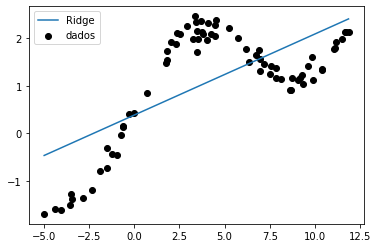

[0.38353816]
[[0.17053516]]


In [60]:
from sklearn.linear_model import Ridge

modelo = Ridge( alpha=1 )
modelo.fit(x, y)

ys = modelo.predict(xs)

plt.scatter(x, y, marker="o", c="black", label="dados")
plt.plot(xs, ys, label="Ridge")
plt.legend()
plt.show()

print(modelo.intercept_)
print(modelo.coef_)

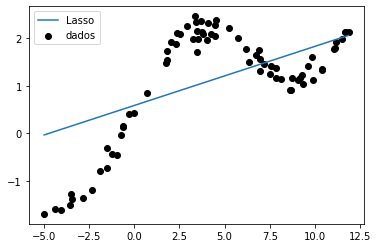

[0.58516005]
[0.12434853]


In [61]:
from sklearn.linear_model import Lasso

modelo = Lasso( alpha=1 )
modelo.fit(x, y)

ys = modelo.predict(xs)

plt.scatter(x, y, marker="o", c="black", label="dados")
plt.plot(xs, ys, label="Lasso")
plt.legend()
plt.show()

print(modelo.intercept_)
print(modelo.coef_)

# Avaliação de desempenho

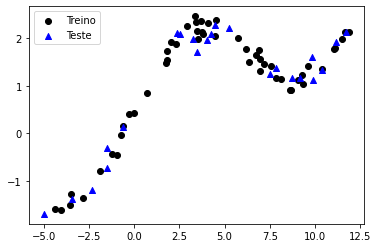

In [63]:
from sklearn.model_selection import train_test_split

xTreino, xTeste, yTreino, yTeste = train_test_split(x, y, test_size=0.3, random_state=13)

plt.scatter(xTreino, yTreino, marker="o", c="black", label="Treino")
plt.scatter(xTeste, yTeste, marker="^", c="blue", label="Teste")
plt.legend()
plt.show()

In [64]:
modeloKNN = KNeighborsRegressor( n_neighbors=5, weights="distance" )
modeloKNN.fit( xTreino, yTreino )
yPreditoKNN = modeloKNN.predict( xTeste )

modeloLR = LinearRegression()
modeloLR.fit( xTreino, yTreino )
yPreditoLR = modeloLR.predict( xTeste )

In [68]:
from sklearn import metrics 

maeKNN = metrics.mean_absolute_error( yTeste, yPreditoKNN )
maeLR = metrics.mean_absolute_error( yTeste, yPreditoLR )

print("KNN: %f"%maeKNN)
print("RL: %f"%maeLR)

KNN: 0.170118
RL: 0.808549


In [72]:
mseKNN = metrics.mean_squared_error( yTeste, yPreditoKNN )
mseLR = metrics.mean_squared_error( yTeste, yPreditoLR )

print("KNN: %f"%mseKNN)
print("RL: %f"%mseLR)

KNN: 0.042203
RL: 0.765850


In [74]:
r2KNN = metrics.r2_score(yTeste, yPreditoKNN)
r2LR = metrics.r2_score(yTeste, yPreditoLR)

print("KNN: %f"%r2KNN)
print("RL: %f"%r2LR)

KNN: 0.972191
RL: 0.495360


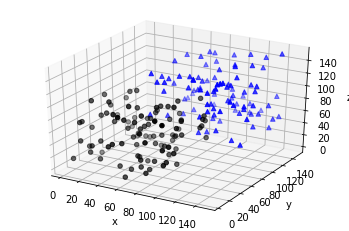

In [75]:
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

n=100

xs = 100*np.random.rand(n)
ys = 100*np.random.rand(n)
zs = 100*np.random.rand(n)
ax.scatter(xs, ys, zs, marker="o", c="black")

xs = 100*np.random.rand(n) + 50
ys = 100*np.random.rand(n) + 50
zs = 100*np.random.rand(n) + 50
ax.scatter(xs, ys, zs, marker="^", c="blue")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show() 